In [1]:
import pandas as pd
import os

In [2]:
RESULTS_DIR = "results"

In [24]:
df = pd.read_csv(os.path.join(RESULTS_DIR, "10_million_with_elevation.csv"))

In [25]:
len(df)

9732519

In [26]:
df.head()

,capture_date,latitude,longitude,value,elevation
0,2018-10-21 01:00:26.000000,36.041080,140.226816,23.0,31
1,2018-10-21 01:00:22.000000,37.796306,140.514413,19.0,72
2,2018-10-21 01:00:16.000000,37.723330,140.476797,15.0,141
3,2018-10-21 00:59:16.000000,52.444900,13.315000,16.0,47
4,2018-10-21 01:00:16.000000,37.787500,140.552400,18.0,107


In [27]:
df["capture_date"].min(), df["capture_date"].max()

('2013-10-05 15:56:19', '2018-10-21 01:00:26.000000')

In [30]:
df.capture_date = pd.to_datetime(df["capture_date"], errors="coerce")

In [31]:
df_mean = df.set_index("capture_date")
df_mean = df_mean.resample("MS").count()

In [32]:
df_mean.head()

,latitude,longitude,value,elevation
capture_date,,,,
2013-10-01,8,8,8,8
2013-11-01,0,0,0,0
2013-12-01,0,0,0,0
2014-01-01,0,0,0,0
2014-02-01,0,0,0,0


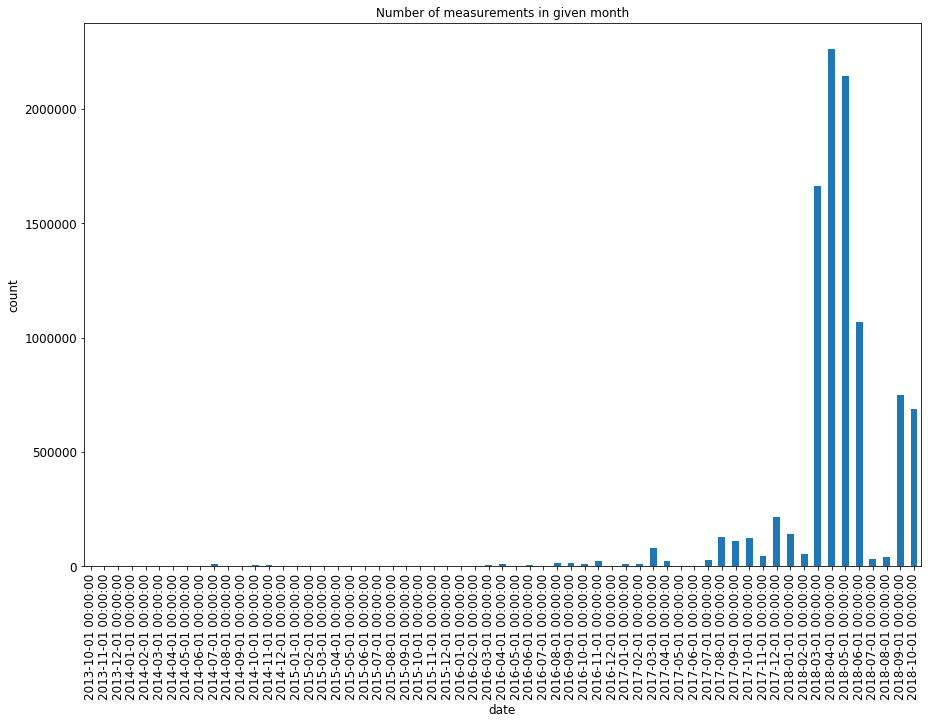

In [35]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

ax = df_mean[["value"]].plot(kind='bar', title = 'Number of measurements in given month', figsize=(15, 10), legend=False, fontsize=12)
ax.set_xlabel("date", fontsize=12)
ax.set_ylabel("count", fontsize=12)
plt.show()